### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Мерич Дорук
##### Группа: НКН

## Москва 2023
***

### Вариант 6

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и определите пары признаков с наиболее низкой и наиболее высокой корреляцией.

In [1]:
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
print(tf.__version__)

2.12.0


In [2]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

In [3]:
ds = tfds.load("howell", split='train') 
df = tfds.as_dataframe(ds)
_1 ='age'
_2 = 'height'

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/howell/1.0.0.incompleteZAOSQD/howell-train.tfrecord*...:   0%|          | …

Dataset howell downloaded and prepared to /root/tensorflow_datasets/howell/1.0.0. Subsequent calls will reuse this data.


In [4]:
correlation_matrix = abs(df.corr())
correlation_matrix

,age,height,male,weight
age,1.000000,0.683689,0.005887,0.678335
height,0.683689,1.000000,0.139229,0.940822
male,0.005887,0.139229,1.000000,0.155443
weight,0.678335,0.940822,0.155443,1.000000


In [5]:
np.fill_diagonal(correlation_matrix.values, np.nan)

lowest_corr_pair = correlation_matrix.unstack().sort_values().dropna().head(1).index.tolist()
highest_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).dropna().head(1).index.tolist()

print("Пара признаков с наиболее низкой корреляцией: ", lowest_corr_pair)
print("Пара признаков с наиболее высокой корреляцией: ", highest_corr_pair)

Пара признаков с наиболее низкой корреляцией:  [('age', 'male')]
Пара признаков с наиболее высокой корреляцией:  [('height', 'weight')]


2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок.  

Text(0, 0.5, 'Y')

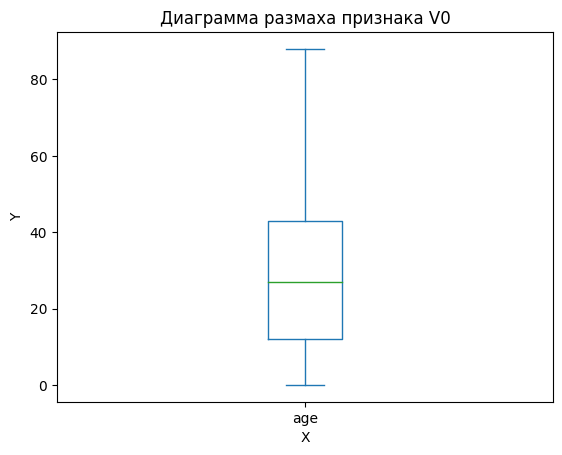

In [6]:
df[_1].plot.box(title='Диаграмма размаха признака V0');
plt.xlabel('X')
plt.ylabel('Y')

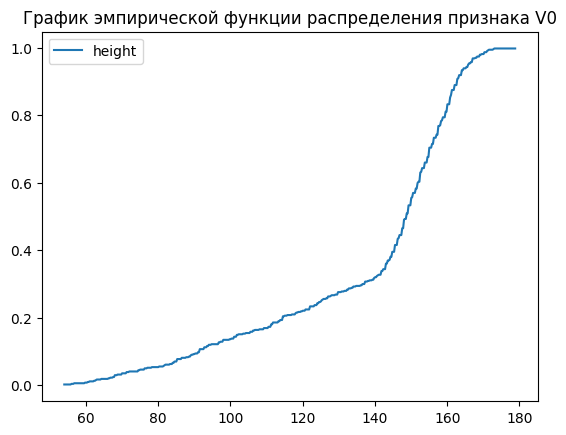

In [7]:
def ECDF(data, x):
    counter = 0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)

samples = df[_2] # sepal length
npoints = 500
dx = (samples.max()-samples.min())/npoints

xlist = [samples.min()+dx*i for i in range(npoints)]
ylist = [ECDF(samples, x) for x in xlist]

df_ECDF = pd.DataFrame(ylist, columns=[_2],index=xlist)
df_ECDF.plot.line(title='График эмпирической функции распределения признака V0');

3. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Вычислите и сравните значения показателей качества $R^2$ двух подходов.

In [8]:
x, y = df[_1], df[_2]
reg = SimpleLinReg()
reg.fit(x, y)
r2_score(y, reg.predict(x))

0.4674300487864326

In [9]:
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ] )
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['mean_absolute_error']
)
model.fit(x, y, epochs=100,verbose=False) 
r2_score(y, model.predict(x))

17/17 [==============================] - 0s 2ms/step


0.4520592061153431

4. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду. 

17/17 [==============================] - 0s 3ms/step


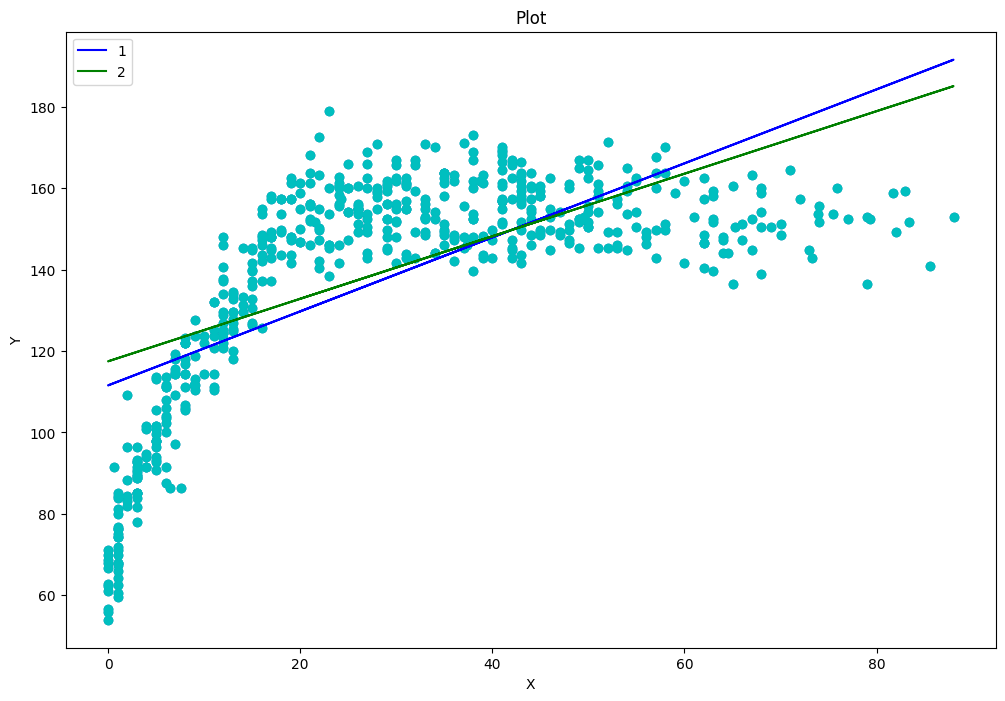

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(x, y)
plt.scatter(x, y, c='c')
plt.plot(x, reg.predict(x), c='b', label='1')
plt.plot(x, model.predict(x), c='g', label='2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Plot")
plt.legend();

5. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака). 

In [11]:
X = df.drop([_2],axis=1)
Y = df[_2]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X)

6. Используя созданный нормализующий слой, постройте регресоры на базе следующих моделей множественной регрессии:
    * линейной регрессии
    * гребневой регрессии (L2)
    * лассо регрессии (L1)


In [13]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')
history = linear_model.fit(
    x_train, y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [14]:
l1_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1, 
                          kernel_regularizer=tf.keras.regularizers.L1(l1=0.01))
])
l1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')
history1 = l1_model.fit(
    x_train, y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [15]:
l2_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1, 
                          kernel_regularizer=tf.keras.regularizers.L2(l2=0.01))
])
l2_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.25),
    loss='mean_absolute_error')
history2 = l2_model.fit(
    x_train, y_train,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

7. Определите на контрольной выборке модель множественной регрессии с наиболее высоким качеством по показателю, указанному в индивидуальном задании, среди построенных моделей.

In [16]:
r2_score(y_test, linear_model.predict(x_test)),r2_score(y_test, l1_model.predict(x_test)),r2_score(y_test, l2_model.predict(x_test))

4/4 [==============================] - 0s 3ms/step


(0.8731671645707367, 0.8711693395608286, 0.7776014858242644)

8. Для лучшего регрессора визуализируйте кривые обучения (в зависимости от эпохи обучения).

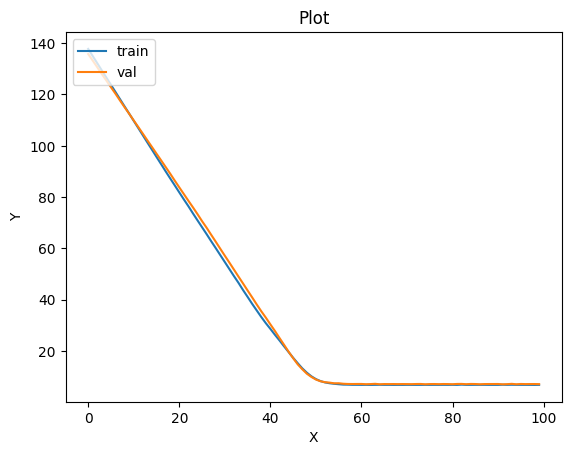

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Plot")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

9. Определите медианные значения признаков (кроме независимого и зависимого признаков) и для построенных медианных значений визуализируйте на плоскости с независимым признаком в качестве оси абсцисс и зависимым признаком в качестве оси ординат точки тестовой выборки и линии (графики) различных моделей множественной регрессии разными цветами. Подпишите оси и создайте легенду и заголовок для рисунка.

In [18]:
x_test[x_test.drop([_1],axis=1).columns] = x_test.drop([_1],axis=1).median()
x_test

,age,male,weight
457,26.000000,0.0,39.292408
257,37.000000,0.0,39.292408
357,52.000000,0.0,39.292408
532,22.000000,0.0,39.292408
542,3.000000,0.0,39.292408
...,...,...,...
506,0.000000,0.0,39.292408
278,63.000000,0.0,39.292408
46,3.000000,0.0,39.292408
93,65.300003,0.0,39.292408


4/4 [==============================] - 0s 2ms/step


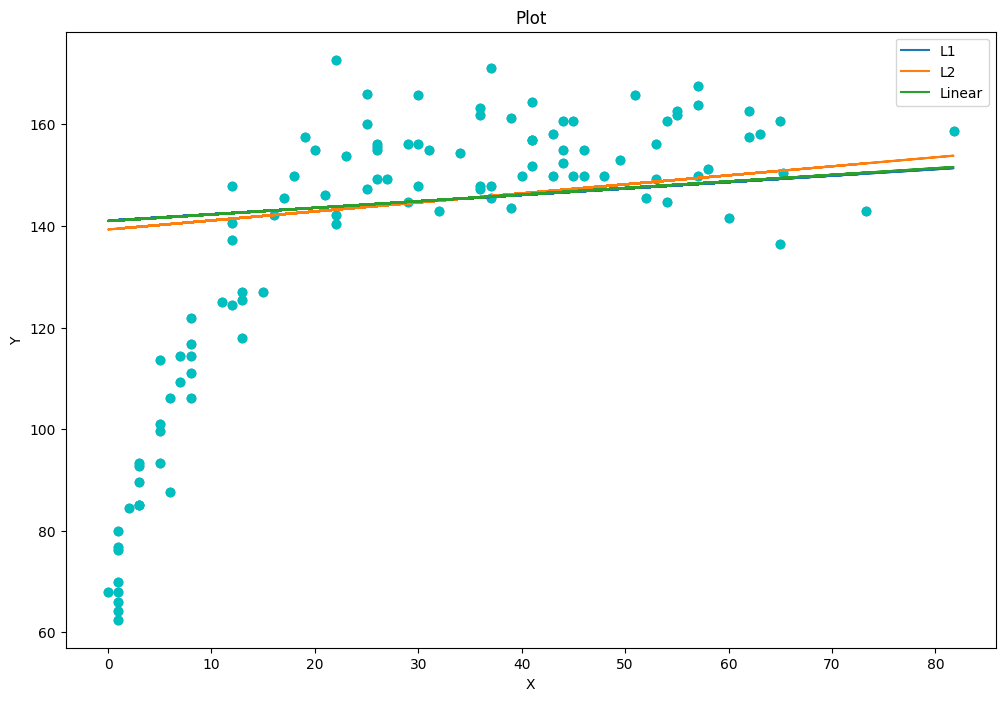

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(x_test[_1], y_test)
plt.scatter(x_test[_1], y_test, c='c')
plt.plot(x_test[_1], l1_model.predict(x_test),label='L1')
plt.plot(x_test[_1], l2_model.predict(x_test),label='L2')
plt.plot(x_test[_1], linear_model.predict(x_test), label='Linear')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Plot")
plt.legend();